## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [4]:
# 把兩個訓練資料集和測試資料集讀進來
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [5]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
print(df_test.columns)
print(df_train.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [6]:
#可以嘗試用範例的程式
print(df_test.isnull().any())
print(df_test.isnull().any().sum())

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
3


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [7]:
#合併資料
df=df_train.append(df_test)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None


C:\Users\avalin\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [8]:
# 以 XXX 為例，先看 Cabin  出現值的特性
print(df['Cabin'].isnull().sum())

1014


In [10]:
df['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [11]:
df["Cabin"] = df['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')
df["Cabin"]

0      NoCabin
1            C
2      NoCabin
3            C
4      NoCabin
5      NoCabin
6            E
7      NoCabin
8      NoCabin
9      NoCabin
10           G
11           C
12     NoCabin
13     NoCabin
14     NoCabin
15     NoCabin
16     NoCabin
17     NoCabin
18     NoCabin
19     NoCabin
20     NoCabin
21           D
22     NoCabin
23           A
24     NoCabin
25     NoCabin
26     NoCabin
27           C
28     NoCabin
29     NoCabin
        ...   
388    NoCabin
389    NoCabin
390          B
391          D
392    NoCabin
393    NoCabin
394    NoCabin
395          C
396    NoCabin
397          B
398    NoCabin
399    NoCabin
400          C
401    NoCabin
402    NoCabin
403    NoCabin
404          D
405          D
406    NoCabin
407          C
408    NoCabin
409    NoCabin
410    NoCabin
411          C
412    NoCabin
413    NoCabin
414          C
415    NoCabin
416    NoCabin
417    NoCabin
Name: Cabin, Length: 1309, dtype: object

In [13]:
df["Cabin"].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

C:\Users\avalin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


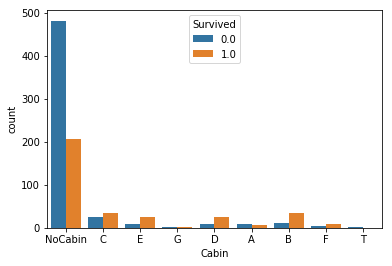

In [15]:
sns.countplot(df['Cabin'], hue=df['Survived'])

無cabin死亡率較高

In [19]:
df[['Cabin', 'Survived']].groupby(['Cabin']).mean()

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
NoCabin,0.299854
T,0.000000
